Importar Librerías

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cargar conjunto de datos

In [ ]:
# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist

# Cargue la divisidn de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalización datos

In [ ]:
# Normalizar los valores de pixeles del tren y probar las imagenes.
training_images = training_images / 255.0
test_images = test_images / 255.0

Construcción del modelo

In [ ]:
# Construir el modelo de clasificacion.
model = keras.models. Sequential ([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    # Agrega las mismas capas que antes.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Compilación del modelo

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Entrenamiento del modelo

Epoch 1/10
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1478 - accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0525 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0107 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0082 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 10/10
1875/1875 [==============================] - 46s 25m

<Axes: >

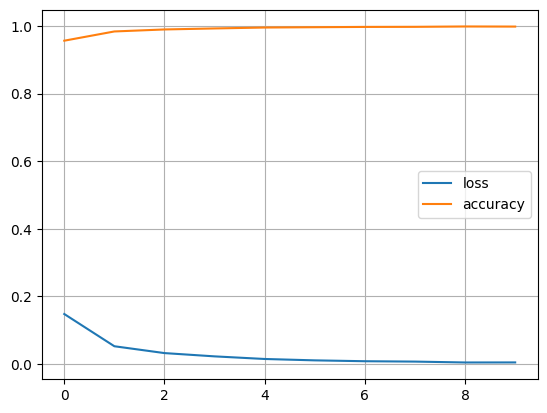

In [ ]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

Evaluación del modelo

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print ("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0022 - accuracy: 0.9993
Pérdida en el conjunto de entrenamiento: 0.0021800247486680746
Precisión en el conjunto de entrenamiento: 0.9992833137512207
313/313 [==============================] - 3s 10ms/step - loss: 0.0509 - accuracy: 0.9876
Pérdida en el conjunto de prueba: 0.05094614624977112
Precisión en el conjunto de prueba: 0.9876000285148621


Predicción

In [ ]:
#predict

index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 103ms/step
Classification:
 [[6.2868459e-14]
 [5.8617651e-13]
 [1.0000000e+00]
 [8.8869853e-18]
 [5.7841864e-21]
 [9.6029096e-22]
 [7.4487034e-14]
 [6.1988874e-18]
 [6.1698025e-17]
 [3.4405631e-20]]


Preparación de datos

In [ ]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


Selección Imágenes de Interes

In [ ]:
FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14
print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[ THIRD_IMAGE])

1
1
1


Visualización de Imágenes

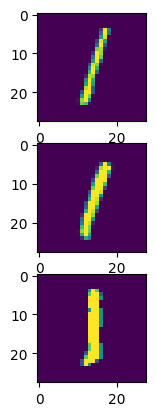

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [ ]:
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

Visualización de Convoluciones

1/1 [==============================] - 0s 25ms/step


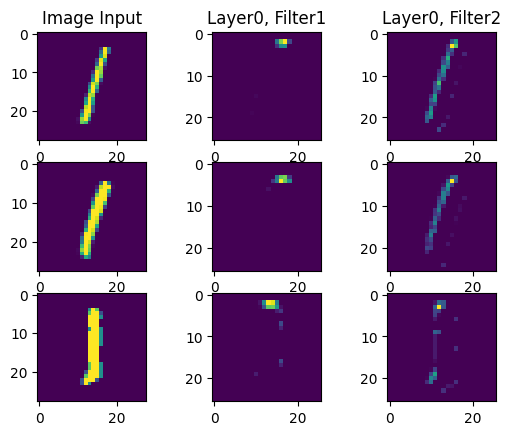

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])